In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats


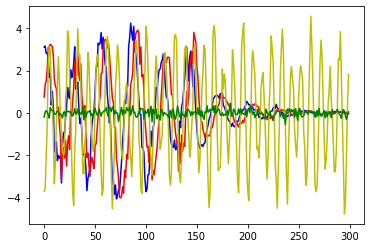

In [2]:


points = 300

sigma = 0.3 # mean and standard deviation
a = np.random.normal(1, sigma, points)
b = np.random.normal(3, sigma, points)

c_1 = np.ones(points//2)
c_2= np.array([1/np.sqrt(max(t,1)) for t in range(points//4)])
c_3= np.array([1/(t+4) for t in range(points//4)])

c = np.append(c_1, c_2)
c = np.append(c, c_3)

err = np.random.normal(0, sigma, points)

err2 = np.random.normal(0, sigma, points)



t = np.array(range(points))

frec1 = 5
frec2 =7


x = c*(a * np.sin(2*np.pi * (t/200) * frec1) + b * np.cos(2*np.pi * (t/200) * frec2) + err)

y = c*(a * np.sin(2*np.pi * ((t-5)/200) * frec1) + b * np.cos(2*np.pi * ((t-5)/200) * frec2) + err)

y2 = (a * np.sin(2*np.pi * ((t-5)/200) * 3 * frec1) + b * np.cos(2*np.pi * ((t-5)/200) * 3 * frec2) + err)

z = 0.5*err2

import matplotlib.pyplot as plt



plt.plot(t,x, color='b')
plt.plot(t,y, color='r')
plt.plot(t,y2, color='y')
plt.plot(t,z, color='g')

plt.show()

In [3]:
a = np.array([1,2,3,4])
b = np.array([11,12,13,14])
c = np.array([21,22,23,24])
print(a)
print(np.column_stack([a,b,c]))

[1 2 3 4]
[[ 1 11 21]
 [ 2 12 22]
 [ 3 13 23]
 [ 4 14 24]]


In [4]:
def generate_data_lasso_problem(x,y, L):
    data_x = []
    data_y = []
    y_vals = []
    for t in range(L,len(x)):
        y_t = y[t-1]
        x_prev = x[t-L:t-1]
        y_prev = y[t-L:t-1]
        data_x.append(x_prev)
        data_y.append(y_prev)
        y_vals.append(y_t)
    return np.array(data_x),np.array(data_y), np.array(y_vals)

def generate_data_lasso_problem2(x,y, L):
    data_x = []
    data_y = []
    y_vals = []
    for t in range(L,len(x)):
        y_t = y[t-1]
        x_prev = x[t-L:t-1]
        y_prev = y[t-L:t-1]
        data_x.append(x_prev)
        y_vals.append(y_t)
    return np.array(data_x), np.array(y_vals)



def apply_lagg(x,L):
    data_x = []
    for t in range(L,len(x)):
        x_prev = x[t-L:t-1]
        data_x.append(x_prev)
    data_x.reverse()
    return np.array(data_x)


def generate_data_lasso_problem_multiple(x_array, y, L):
    
    data_x_array = []
    data_y = apply_lagg(y,L)
    
    data_x_array.append(data_y) 
       
    for x in x_array:
        data_x_array.append(apply_lagg(x,L))
    
    y_vals = []
    for t in range(L,len(x)):
        y_t = y[t-1]
        y_vals.append(y_t)
    y_vals.reverse()
        
    data = np.column_stack(data_x_array)
        
    return data, np.array(data_y), np.array(y_vals)

In [30]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)


for i in range(2,4):
    data_x, data_y, y_vals = generate_data_lasso_problem(x,y, i)
    
    data = np.block([data_y, data_x])
    res = clf.fit(data_x,y_vals)

    print("lag ", i, clf.coef_)
    print("lag ", i, clf.score)



lag  2 [0.55442631]
lag  2 <bound method RegressorMixin.score of Lasso(alpha=0.1)>
lag  3 [ 0.83621852 -0.14967659]
lag  3 <bound method RegressorMixin.score of Lasso(alpha=0.1)>


In [31]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)


for i in range(2,4):
    data, data_y, y_vals = generate_data_lasso_problem_multiple([x,y2],y, i)
     
    res = clf.fit(data,y_vals)

    print("lag ", i, clf.coef_)
    print("lag ", i, clf.score)


lag  2 [ 0.81473092  0.18493746 -0.        ]
lag  2 <bound method RegressorMixin.score of Lasso(alpha=0.1)>
lag  3 [ 0.16035844  0.57593809  0.2808758   0.         -0.         -0.        ]
lag  3 <bound method RegressorMixin.score of Lasso(alpha=0.1)>


In [32]:
data, data_y, y_vals = generate_data_lasso_problem_multiple([y,y2,z],x, 4)

print(data.shape)
print("----")
 

(296, 12)
----


In [5]:

# grid search hyperparameters for lasso regression
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

#data_x, data_y, y_vals = generate_data_lasso_problem(x,y, 5)
#data = np.block([data_y, data_x])
data_x , y_vals = generate_data_lasso_problem2(x,y, 5)
data = data_x

# define model
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.001)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(data, y_vals)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

alpha = results.best_params_["alpha"]
clf = Lasso(alpha=alpha)
res = clf.fit(data,y_vals)

print("lag ", clf.coef_)
print(clf.predict(data))

/home/goku/.virtualenvs/paper_informed_time_series_causality-y8qmi1um/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/home/goku/.virtualenvs/paper_informed_time_series_causality-y8qmi1um/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/goku/.virtualenvs/paper_informed_time_series_causality-y8qmi1um/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.094e+01, tolerance: 6.768e-02 Linear regression models with 

MAE: -0.311
Config: {'alpha': 0.011}
lag  [ 0.83210032  0.33130574  0.03131625 -0.31332622]
[ 2.86747049e+00  2.88531882e+00  2.85920511e+00  2.70067872e+00
  2.64162995e+00  1.73421049e+00  1.60628926e+00  1.26541454e+00
  1.48136409e+00  8.37969846e-02 -1.40497463e+00 -1.29858187e+00
 -1.24522003e+00 -1.93545225e+00 -1.37380475e+00 -2.05554641e+00
 -2.53759968e+00 -2.96768712e+00 -1.51337134e+00 -1.14261772e+00
 -1.19757306e+00 -2.83834821e-01  4.65899664e-01  6.80888259e-01
  4.65873992e-01  7.55465946e-01  1.59901377e+00  1.09853013e+00
  2.02645525e+00  2.67552643e+00  2.58135518e+00  1.29746774e+00
  1.65607097e+00  1.42097827e+00  4.08042973e-01  1.28989937e-01
  8.79670052e-02 -8.01834619e-01 -1.51041208e+00 -1.19521224e+00
 -1.58834422e+00 -2.58086660e+00 -3.33117961e+00 -3.20255511e+00
 -3.10046505e+00 -2.48722153e+00 -1.19098076e+00 -7.72429358e-01
 -6.92966533e-01 -1.51952973e-01  6.37616452e-01  1.61780175e+00
  2.05127154e+00  2.75567501e+00  2.97982706e+00  3.00701347e+0

In [12]:
import pylops
from sklearn.linear_model import Lasso

#data_x, data_y, y_vals = generate_data_lasso_problem(x,y, 5)
#X = np.block([data_y, data_x])

data_x , y_vals = generate_data_lasso_problem2(x,y, 5)
X = data_x

print(X.shape, y_vals.shape)

Aop = pylops.MatrixMult(X)

eps = 0.009
maxit = 10000


xinv, niter, cost = pylops.optimization.sparsity.FISTA(
    Aop, y_vals, maxit, eps=eps, tol=1e-25, returninfo=True
)

xinv, niter, cost


(295, 4) (295,)


(array([ 0.82807024,  0.42412339, -0.00667022, -0.41162357]),
 5501,
 array([99.27451567, 89.99128935, 79.83603405, ..., 31.78745927,
        31.78745927, 31.78745927]))

In [7]:
from sklearn.base import BaseEstimator
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso

import pylops

def calculate_fista_model(X, y, eps):
    k = np.sqrt(1/(2*len(y)))
    X = k*X
    y = k*y

    Aop = pylops.MatrixMult(X)
    maxit = 1000
    xinv, niter, cost = pylops.optimization.sparsity.FISTA(Aop, y, maxit, eps=eps, tol=1e-5, returninfo=True)
    return xinv, cost


def calculate_error(x, X, y):
    #err = np.linalg.norm(y.T - np.matmul(X,x.T)) + eps * np.linalg.norm(x, ord=1)
    #err = (1 / (2 * len(y))) * np.linalg.norm(y.T - np.matmul(X,x.T))**2 + eps * np.linalg.norm(x, ord=1)
    predicted_val = np.matmul(X,x.T)
    err = (1 / (2 * len(y))) * np.linalg.norm(y.T - np.matmul(X,x.T))**2 + eps * np.linalg.norm(x, ord=1)
    err = -np.linalg.norm(y.T - np.matmul(X,x.T))**2 /len(y)
    return err


#X, y_vals = generate_data_lasso_problem(x,y, 5)
#print(X.shape, y_vals.shape)
#xinv = calculate_fista_model(X, y_vals, 0.01)
#calculate_error(xinv, X,y_vals)

class FistaEstimator(BaseEstimator):
   def __init__(self, alpha=0.01):
      self.alpha = alpha
    
   def fit(self, X, y):
      self.coef_, cost = calculate_fista_model(X, y, self.alpha)
      self.score_ = cost[len(cost)-1]
      #print(cost)
      
   def score(self, X, y, sample_weight=None):
      y_pred = self.predict(X)
      return r2_score(y, y_pred, sample_weight=sample_weight)
      
   def predict(self, X):
      return np.matmul(X,self.coef_.T)


X, data_x, x_vals = generate_data_lasso_problem_multiple([y,y2],x, 5)
 
alph = 0.3
fista = FistaEstimator(alpha = alph)
fista.fit(X,x_vals)
result = fista.predict(X)
print(fista.coef_)



lasso = Lasso(alpha=alph)
lasso.fit(X,x_vals)
print(lasso.coef_)


print(lasso.predict([X[25]]))
print(fista.predict([X[25]]))



[ 0.          0.          0.          0.79665934 -0.09694014 -0.
 -0.         -0.          0.          0.         -0.         -0.        ]
[ 0.          0.          0.          0.79642732 -0.09738162 -0.
 -0.         -0.          0.          0.         -0.         -0.        ]
[-0.06109966]
[-0.06910151]


In [6]:
# grid search hyperparameters for lasso regression
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

data, data_x, x_vals = generate_data_lasso_problem_multiple([y,y2,z],x, 5)
 
print(data.shape)

# define model
models = [Lasso,FistaEstimator]
for model in models:
    print("model")
    # define model evaluation method
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    # define grid
    grid = dict()
    grid['alpha'] = arange(0.01, 2, 0.01)
    # define search
    search = GridSearchCV(model(), grid, cv=cv, scoring='neg_mean_absolute_error', n_jobs=7, verbose=1)
    #search = GridSearchCV(model(), grid, scoring='max_error', cv=cv, n_jobs=7, verbose=1)
    # perform the search
    results = search.fit(data, x_vals)
    # summarize
    print('MAE: %.3f' % results.best_score_)
    print('Config: %s' % results.best_params_)

    alpha = results.best_params_["alpha"]
    clf = model(alpha=alpha)
    res = clf.fit(data,x_vals)

    print("lag ", clf.coef_)    
    print("shape ", len(clf.coef_))

(295, 16)


NameError: name 'FistaEstimator' is not defined

In [25]:
import sklearn as sklearn
print(sklearn.metrics.get_scorer_names())
print("---")

print(sorted(sklearn.metrics.SCORERS.keys()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 

In [5]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd

df = pd.DataFrame({'a': x, 'b':  z}) 

grangercausalitytests(df[['a', 'b']], maxlag=[5,7])


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.5365  , p=0.1784  , df_denom=284, df_num=5
ssr based chi2 test:   chi2=7.9802  , p=0.1573  , df=5
likelihood ratio test: chi2=7.8742  , p=0.1633  , df=5
parameter F test:         F=1.5365  , p=0.1784  , df_denom=284, df_num=5

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=1.2128  , p=0.2956  , df_denom=278, df_num=7
ssr based chi2 test:   chi2=8.9475  , p=0.2564  , df=7
likelihood ratio test: chi2=8.8136  , p=0.2663  , df=7
parameter F test:         F=1.2128  , p=0.2956  , df_denom=278, df_num=7


{5: ({'ssr_ftest': (1.5365231801840271, 0.17843392052885948, 284.0, 5),
   'ssr_chi2test': (7.980182009758592, 0.1573312232786886, 5),
   'lrtest': (7.874152131020082, 0.16330909273420832, 5),
   'params_ftest': (1.536523180184043, 0.17843392052885892, 284.0, 5.0)},
   array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])]),
 7: ({'ssr_ftest': (1.2127733788465636, 0.29562511700438737, 278.0, 7),
   'ssr_chi2test': (8.947475539619791, 0.2564491294604356, 7),
   'lrtest': (8.813578054968957, 0.26631899775351736, 7),
   'params_ftest': (1.212773378846549, 0.2956251170044027, 278.0, 7.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 

In [22]:
from sklearn.linear_model import Lasso


class GraphicalGranger:
    minimal_alpha = 0.2
    alpha = None
    time_series = []
    
    def __init__(alpha_min=0.2):
        pass

    def obtain_alpha_model_using_cross_validation(self, data, x_vals, model):
        grid = dict()
        grid['alpha'] = arange(self.minimal_alpha, 2, 0.01)
        
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

        search = GridSearchCV(model(), grid, cv=cv, scoring='neg_mean_absolute_error', n_jobs=7)

        results = search.fit(data, x_vals)
        # summarize
        print('MAE: %.3f' % results.best_score_)
        print('Config: %s' % results.best_params_)

        alpha = results.best_params_["alpha"]
        return alpha

    def graphical_relations(self, x, y_array,lag, fixed_alpha=None, use_model="lasso"):
        if use_model == "lasso":
            model = Lasso
        elif use_model == "fista":
            model = FistaEstimator

        data, data_x, x_vals = generate_data_lasso_problem_multiple(y_array,x, lag)

        if fixed_alpha is None:
            alpha = self.obtain_alpha_model_using_cross_validation(data,x_vals, model)
        else:
            alpha = fixed_alpha

        clf = model(alpha=alpha)
        res = clf.fit(data,y_vals)
        coefs = clf.coef_
        
        

IndentationError: expected an indented block (1558611209.py, line 13)